<a href="https://colab.research.google.com/github/Arpit2811/OIBSIP/blob/main/oasis_project_9_%20Autocomplete_and_Autocorrect_Data_Analytics%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Loading the txt file

In [4]:

with open('corpus.txt', 'r', encoding='utf-8') as file:
    text = file.read()


print(text[:1000])


The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced "no evidence" that any irregularities took place.   
The jury further said in term-end presentments that the City Executive Committee, which had over-all charge of the election, "deserves the praise and thanks of the City of Atlanta" for the manner in which the election was conducted.

The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible "irregularities" in the hard-fought primary which was won by Mayor-nominate Ivan Allen Jr&.   
"Only a relative handful of such reports was received", the jury said, "considering the widespread interest in the election, the number of voters and the size of this city".   
The jury said it did find that many of Georgia's registration and election laws "are outmoded or inadequate and often ambiguous".   
It recommended that Fulton legislators act "to have these laws studied and re

2. NLP Preprocessing

In [6]:
import re
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

nltk.download('punkt_tab')

cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text.lower())


tokens = word_tokenize(cleaned_text)

print(tokens[:50])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', 'atlantas', 'recent', 'primary', 'election', 'produced', 'no', 'evidence', 'that', 'any', 'irregularities', 'took', 'place', 'the', 'jury', 'further', 'said', 'in', 'termend', 'presentments', 'that', 'the', 'city', 'executive', 'committee', 'which', 'had', 'overall', 'charge', 'of', 'the', 'election', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'city', 'of']


3. Build Frequency Dictionary

In [7]:
from collections import Counter


word_freq = Counter(tokens)


print(word_freq.most_common(10))


[('the', 129193), ('of', 62004), ('to', 57588), ('and', 51313), ('a', 48190), ('in', 44632), ('that', 21656), ('for', 19603), ('is', 19199), ('on', 15942)]


4. Autocomplete Using N-Grams

In [8]:
from nltk import ngrams
from collections import defaultdict

def build_ngram_model(tokens, n):
    model = defaultdict(Counter)
    for i in range(len(tokens)-n):
        prefix = tuple(tokens[i:i+n-1])
        next_word = tokens[i+n-1]
        model[prefix][next_word] += 1
    return model

bigram_model = build_ngram_model(tokens, 2)

def autocomplete(prefix, model):
    prefix = tuple(prefix.lower().split())
    if prefix in model:
        return model[prefix].most_common(3)
    else:
        return []

print(autocomplete("the", bigram_model))


[('european', 1347), ('first', 1304), ('us', 1061)]


5. Implement Autocorrect

In [10]:
import numpy as np

def edit_distance(word1, word2):
    dp = np.zeros((len(word1)+1, len(word2)+1), dtype=int)
    for i in range(len(word1)+1):
        for j in range(len(word2)+1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif word1[i-1] == word2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(dp[i-1][j], dp[i][j-1], dp[i-1][j-1])
    return dp[len(word1)][len(word2)]

def autocorrect(word, vocab, max_distance=2):
    suggestions = [w for w in vocab if edit_distance(word, w) <= max_distance]
    return suggestions[:5]

vocab = set(tokens)
print(autocorrect("tommorow", vocab))
print(autocorrect("firrt", vocab))


['tomorrow']
['firms', 'fist', 'fiera', 'fiery', 'airit']


6. Evaluation & Visualization

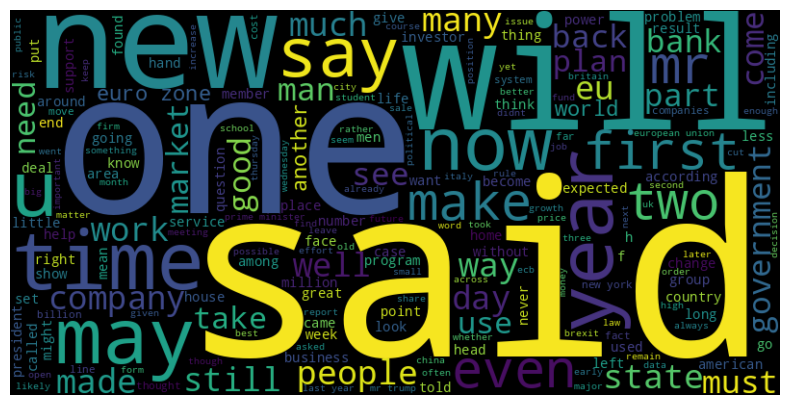

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate(' '.join(tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
